## Mass-Spring Systems
In order to model an object using a mass-spring system, the object is discretized to mass particles $p_i(i=1,...,n)$, then a network of massless springs connecting the particles together is installed. 
Mass-spring systems vary according to the discretization mesh, the way the springs are set between the particles, and the functions used to model the springs.

At any given time t, the state of the system is defined by the position $x_i$ and the velocity $v_i$ of the particles. The force $f_i$ acting on particle $p_i$ is computed according to its spring connections with its neighbors and external forces such as gravity of friction forces. Newton's second law of motion is used to calculate the motion of each particle:
$$ m_i \frac{d \mathbf{x}_i}{dt} = \mathbf{f}_i$$

For the whole system Newton's second law can be formulated in matrix form:
$$ \mathbf{M} \frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x}, \mathbf{v}) $$
where $\mathbf{M}$ is a $3n \times 3n$ diagonal mass matrix. By solving this system of coupled ordinary differential equations, the position of the particles can be updated as the model deforms.

## Problems Associated with Mass-Spring Systems

Ordinary Mass-Spring systems suffer from several intrinsic limitations that restrict their use in physical modeling:
* Not necessarily accurate, not convergent
* Behavior depends on the topology and resolution of the mesh
* Finding the right spring functions and parameters to obtain an accurate model is a very difficult and pplication dependent process.
* Settings the masses correctly to model homogeneous materials is a somewhat troublesome process
* Using ordinary mass-spring systems neither isotropic nor anisotropic materials can be generatied and controlled easily

## Hexahedral Meshes

The mass of the modeled object is discretized according to the mesh into particles that define the vertices of the volume elements of the modeled object. 
In order to setup a homogeneous material, the mass of each particles is computed according to the volume of the Voronoi region around it. In the general case it can be calculated by
$$ m_i = \sum^n_{k=1} \frac{\rho_k V_k}{N_k}$$
where $m_i$ is the mass of the particle $p_i, n$ is the number of volume elements neighboring the particle. $V_k$, $\rho_k$ and $N_k$ are respectively the volume, the mass density, and the number of vertices of the volume element $VV_k$. For a hexahedral mesh $m_i$ is given by $$ m_i = \frac{V_v}{8} \sum_{k=1}^n \rho_k $$
where $n$ si the number of hexahedra neighboring $p_i$ and $\rho_k$ is the mass density of the hexahedron $H_k$. $V_v$ is the volume of a hexahedron of the hexahedral mesh.

## Anisotropy
To control anisotropy several axes of mechanical anisotropy in the barycenter of each volume element of the mesh are generated. Forces generated due to the deformation of the model will act only i nthe direction of these axes. For examples, to model the mechanical deformation of a muscle, the direction of anisotropy axes mush be set in the direction of the fibers of the muscle in each of the volume elements of the model's mesh. Although the method allows the definition of several axes of anisotropy, only three were defined in each of volume elements. This was enough to model the anisotropic mechanical behavior of all types of materials modeled with the developed framework.

In a volume element, each axis interscts with the faces of that element in two points, called intersection points. During deformation, the axes evolve with the volume elements to which they belong. At any given moment t, the orientation of an axis  $\zeta_1$ in a volume element $\mathcal{V}_k$ can be determined using the line extended between the pair of intersection points the axis defines. This can be done numerically by calculating the vector between the pair $(q_{2l}, q_{2l+1})$ regardless of its direction. The vector is given by $$ \zeta_l^t = \mathbf{x}^t_{2l} - \mathbf{x}^t_{2l+1}$$
For this reason, intersection points are used to track the axes of anisotropies during the deformation of the model

To compute the coordinates of the intersection points at any moment $t$, and hence the orientation of the anisotropy axes, the coordinates $\mathbf{x}_j^t$ of each intersection point $q_j$ are given by a linear interpolation of the coordinates of the face vertices to which it belongs, using the rectangle linear interpolation shape function.
$$ \mathbf{x}_j^t = \sum_{i=1}^4 N_i \left (  \xi_j, \eta_j \right ) \mathbf{x}_i^t$$
where $\mathbf{x}_i^t$ are the coordinates of the vertices of the rectangular face $\mathcal{F}_j$ to which $q_j$ belongs and $N_i \left (  \xi_j, \eta_j \right )$ are the rectangle linear interpolation shape functions and are given by:
$$
\begin{align*}
 N_1 \left (  \xi_j, \eta_j \right ) &= \left (1 - \xi_j \right)\left(1 - \eta_j \right) \\
 N_2 \left (  \xi_j, \eta_j \right ) &= \xi_j \left(1 - \eta_j \right) \\
 N_3 \left (  \xi_j, \eta_j \right ) &= \xi_j \eta_j \\
 N_4 \left (  \xi_j, \eta_j \right ) &= \left (1 - \xi_j \right)\eta_j
\end{align*} 
$$

![alt text](./hexa.png "Title")

### Computing the intersection points
The intersection points and the corresponding shape functions are also computed in the initialization state using the following scheme:
1. For each hexahedron $\mathcal{H}_k$ of the mesh repeat:
2. For each of the three axes $\zeta_i$ of $\mathcal{H}_k$, repeat:
3. For each face $\mathcal{F}_j$ of $\mathcal{H}_k$, repeat the following steps to locate intersection points axis $\zeta_i$ defines:
4. Compute the point where the line extending from the center $p_{bk}$ of $\mathcal{H}_k$ and which is parallel to $\zeta_i$ intersects with the plane containing $\mathcal{F}_j$
5. If the computed point was outside of $\mathcal{F}_j$, it is not a valid intersection point, to to step 3
6. If the point is in $\mathcal{F}_j$, it is a valid intersection point, compute the related shape function values
7. If two valid intersection points were found fror $\zeta_i$, go to step 2

![alt text](./hexa2.png "Title")

### Coefficient Matrix $C$

The shape functions of each of the intersection points of a hexahedron $\mathcal{H}_k$ can be arranged in a matrix $C_k$, we call the coefficient matrix, according to 
$$
C_{ij} = \begin{cases}
         N_{ij} \text{ for $q_j$ and if vertex $p_i$ is in face $\mathcal{F}_j$} \\
         0
         \end{cases}
$$
The coefficient matrix $C_k$ is an $8 \times 6$ matrix. With the help of $C_k$ it is possible to calculate the coordinates of an intersection point $q^t_j$ at time $t$ by:
$$
\mathbf{x}^t_j = \sum^8_{i=1} C_{ij}\mathbf{x}_i^t
$$

### Handling Anisotropy

$$
\mathbf{x}^t_j = \sum^8_{i=1} C_{ij}\mathbf{x}_i^t
$$

To model anistropy the deformation due to forces acts in the direction of the element axes $\zeta_i$. These axes intersect with the faces of the element in intersecion points $q_j$ with coordinates $\mathbf{x}_j$. The coordinates can be calculated using the matrix $\mathbf{C}_{ij}$:
$$
\mathbf{x}^t_j = \sum^n_{i=1} C_{ij}\mathbf{x}_i^t
$$
where $n$ is the number of vertices of the element $\mathcal{V}$. The velocity in the intersection points can be calculated by:
$$
\frac{d\mathbf{x}^t_j}{dt} = \sum^n_{i=1} C_{ij} \frac{d\mathbf{x}_i^t}{dt}. 
$$
Anisotropy is then handled by first calculating the force $\mathbf{f}_j$ at intersection point $q_j$ and then distributing this force to the vertices of the face that $q_j$ belongs to. The portion of $\mathbf{f}_j$ belonging to the vertex $p_i$ is given by:
$$
\mathbf{f}_{ij} = N_i\left ( \xi_j, \eta_j \right).
$$
Here, the index $j$ references the force in the intersection point $q_j$ and the index $i$ the vertex $p_i$ that we want to distribute it to.

Thus, the force $\mathbf{f}_i$ acting at vertex $p_i$ of a certain volume element $\mathcal{V}_k$ is the accumulation of the portions of the forces $\mathbf{f}_{ij}$ acting of intersection points belonging to the same faces as $p_i$. Here we can make use of the matrix $\mathbf{C}$ in calculating these forces:
$$
\mathbf{f}^t_i = \sum^5_{j=0} C_{ij}\mathbf{f}_j^t.
$$
The summation goes from $j=0 \dots 5$ because we have $6$ intersection points per element.

$$ 
\zeta \eta \xi \chi
$$

### Types of Forces action on an Element
The term $\textit{internal forces}$ can either refer to forces generated in the volume element due to deformation, or forces generated internally due to some other ongoing internal force generation process ($\textit{active forces}$).

#### Axial and Torsion Springs (Internal Forces)

In each volume element $\mathcal{V}_k$ we define axial springs $\mathcal{S}_l$ between each pair $ \left (q_{2l}, q_{2l+1} \right )$ of intersection points. A torsion spring $\tau_{lm}$ is defined between each pair of these axial springs $\left (\mathcal{S}_l, \mathcal{S}_m \right)$. In total, three axial springs and three torsion springs are defined in each volume element that uses this method to calculate internal forces.
The initial length of an axial spring can be computed as:
$$
l^0_{\mathcal{S}_l} = \left \| \zeta^0_l \right \| = \left \| \mathbf{x}^0_{2l} - \mathbf{x}^0_{2l+1} \right \|
$$

The unit vector $\hat{\zeta_l}$ in the direction of $\zeta_l$ can be used to calculate the angle $\alpha_{lm}$ between 
axes $\zeta_l$, $\zeta_m$ by
$$
\alpha_{lm} = \arccos \left ( \zeta_l \cdot \zeta_m \right )
$$
#### Forces on Intersection points
The forces $\mathbf{f}_{2l}$ and $\mathbf{f}_{2l+1}$ the springs exert on intersection points $q_{2l}$ and $q_{2l+1}$ defined by axis $\zeta_l$ are composed of an axial component $\mathbf{f}_{\mathcal{S}}$ and two torsion components $\mathbf{f}_{\tau}$. This can be formulated by
$$
\mathbf{f}_{2l} = \mathbf{f}_{\mathcal{S}} \left (  \zeta_l, \alpha_{lm}, \alpha_{ln}  \right ) \hat{\zeta_l} + \mathbf{f}_{\tau} \left (  \zeta_l, \alpha_{lm}, \alpha_{ln}  \right ) \hat{\zeta_m} + \mathbf{f}_{\tau} \left (  \zeta_l, \alpha_{lm}, \alpha_{ln}  \right ) \hat{\zeta_n}
$$

$$
\mathbf{f}_{2l+1} = -\mathbf{f}_{2l}
$$

Here a spring function $\mathbf{f}_{\mathcal{S}} \left (  \zeta_l, \alpha_{lm}, \alpha_{ln}  \right )$ gives the magnitude of the force and the unit vector $\hat{\zeta_l}$ gives the direction of the force.

#### Linear Axial Spring
The most basic type of spring is the linear axial spring defined by Hooke's law:
$$
\mathbf{f}_{2l} = -k_l \left ( \left \| \zeta_l \right \| - \left \| \zeta_l^0 \right \| \right ) \hat{\zeta_l}
$$
$$
\mathbf{f}_{2l} = - \mathbf{f}_{2l+1}
$$
here $k$ is the stiffness constant of the spring.

#### Higher Order Axial Spring
$$
\mathbf{f}_{2l} = - \left ( \sum_{i=1}^n k_{l,i} \left ( \left \| \zeta_l \right \| - \left \| \zeta_l^0 \right \| \right )^i \right ) \hat{\zeta_l}
$$
here $n$ is the rank of the function which in this work we will limit to quadratic or cubic.

#### Fitting of the stiffness parameters
The unscaled stiffness parameters $E_l$ can be found by fitting the spring function to the strain-stress curve. The parameter $E_l$ then has a unit of $[N$ / $m^2]$. We can rewrite the linear axial spring equation as:
$$
\mathbf{f}_{2l} = -k_l \left ( \left \| \zeta_l \right \| - \left \| \zeta_l^0 \right \| \right ) \hat{\zeta_l}
$$
$$
k_l = E_l A_j \left | \mathbf{n}_j \cdot \hat{\zeta_l} \right |
$$
in this equation the variable $A_j$ is the face surface are of the face $\mathcal{F}_j$ where intersection point $q_2l$ is located. Note that this way the equation 
$$
\mathbf{f}_{2l} = - \mathbf{f}_{2l+1}
$$
is no longer valid. The same is true for the higher order spring function.

#### Linear Torsion Springs
Torsion springs act between a pair of deformation axes and instead of a rest length, a rest angle $\alpha_{lm} = \arccos \left ( \hat{\zeta_l} \cdot \hat{\zeta_m} \right ) $ is used. The linear torsion spring function is given by:
$$
\mathbf{f}_{2l} = -k_{lm} (\alpha_{lm} - \alpha_{lm}^0) \hat{\zeta_m} \\
\mathbf{f}_{2m} = -k_{lm} (\alpha_{lm} - \alpha_{lm}^0) \hat{\zeta_l} \\
\mathbf{f}_{2l+1} = - \mathbf{f}_{2l} \\
\mathbf{f}_{2m+1} = - \mathbf{f}_{2m}
$$

#### Cubic Torsion Springs
$$
\mathbf{f}_{2l} = - \left ( \sum_{i=1}^3 k_{lm} \left ( \alpha_{lm} - \alpha_{lm}^0 \right )^i \right ) \hat{\zeta_m} \\
\mathbf{f}_{2m} = - \left ( \sum_{i=1}^3 k_{lm} \left ( \alpha_{lm} - \alpha_{lm}^0 \right )^i \right ) \hat{\zeta_l} \\
\mathbf{f}_{2l+1} = - \mathbf{f}_{2l} \\
\mathbf{f}_{2m+1} = - \mathbf{f}_{2m}
$$

#### Fitting of the stiffness parameters
$$
\mathbf{f}_{2l} = -k_{lm} (\alpha_{lm} - \alpha_{lm}^0) \hat{\zeta_m} \\
\mathbf{f}_{2m} = -k_{lm} (\alpha_{lm} - \alpha_{lm}^0) \hat{\zeta_l} \\
\mathbf{f}_{2l+1} = k_{lm} (\alpha_{lm} - \alpha_{lm}^0) \hat{\zeta_m} \\
\mathbf{f}_{2m+1} = k_{lm} (\alpha_{lm} - \alpha_{lm}^0) \hat{\zeta_l} \\
k_{lm} = k_{lm} A_j\left | \mathbf{n}_j \cdot \hat{\zeta_l} \right |
$$

### Backward Euler Method
In the backward Euler method the solution for the next timestep depends only on the forces which will arise at timestep $t_{n+1}$:
$$
\begin{align}
\mathbf{v}^{i+1} & = \mathbf{v}^{i} + \Delta \mathbf{v}\\
\Delta \mathbf{v} & = \mathbf{M}^{-1} F \left (\mathbf{u}^{i+1}, \mathbf{v}^{i+1}, t_{i+1} \right )h \\
\mathbf{u}^{i+1} & = \mathbf{u}^{i} + \mathbf{v}^{i+1} \cdot h
\end{align}
$$
#### Taylor Series Expansion
$$
\begin{align}
F_{d} \left (\mathbf{u}^{i+1}, \mathbf{v}^{i+1}, t_{i+1} \right ) & = F \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right )\\
& + \frac{\partial}{\partial \mathbf{u}}  F \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right ) \left (\mathbf{u}^{i+1} - \mathbf{u}^{i}\right ) \\
& + \frac{\partial}{\partial \mathbf{v}}  F \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right ) \left (\mathbf{v}^{i+1} - \mathbf{v}^{i}\right ) \\
& + \frac{\partial}{\partial t}  F \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right )h
\end{align}
$$

#### Matrix Form
$$
\mathbf{A} \Delta \mathbf{v} = \mathbf{b}
$$
$$
\mathbf{A} = 1 - h \mathbf{M}^{-1} \frac{\partial}{\partial \mathbf{v}} \mathbf{F} \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right ) - h^2 \mathbf{M}^{-1} \frac{\partial}{\partial \mathbf{u}} \mathbf{F} \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right )
$$

$$
\mathbf{b} = h \mathbf{M}^{-1} \mathbf{F}_a \left (t_{i+1} \right ) + h \mathbf{M}^{-1} \frac{\partial}{\partial \mathbf{u}} \mathbf{F} \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right ) + h^2 \mathbf{M}^{-1} \frac{\partial}{\partial \mathbf{u}} \mathbf{F} \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right ) \mathbf{v}_i
$$

In the equation for vector $\mathbf{b}$ we have neglected the time derivative $h^2 \mathbf{M}^{-1} \frac{\partial}{\partial t} \mathbf{F} \left (\mathbf{u}^{i}, \mathbf{v}^{i}, t_{i} \right )$

$$
\frac{\partial}{\partial \mathbf{u}} \mathbf{F} = \left [ 
\begin{array}{ccc}
\frac{\partial}{\partial x}{F}_x & \frac{\partial}{\partial y}{F}_x & \frac{\partial}{\partial z}{F}_x \\
\frac{\partial}{\partial x}{F}_y & \frac{\partial}{\partial y}{F}_y & \frac{\partial}{\partial z}{F}_y \\
\frac{\partial}{\partial x}{F}_z & \frac{\partial}{\partial y}{F}_z & \frac{\partial}{\partial z}{F}_z 
\end{array}
\right ]
$$

We can approximate this Jacobian by using the difference quotient:
$$
\frac{\partial}{\partial \mathbf{u}} \mathbf{F} = \mathbf{J} = \frac{\mathbf{F}_d - \hat{\mathbf{F}}_d \left ( \hat{\mathbf{u}} \left (m \right ) \right )}{\Delta u} 
$$
Here $\hat{\mathbf{u}}$ is constructed from the vector $\mathbf{u}$ by adding a v

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
data = np.loadtxt('pp_strain_stress.csv')
#data[:,1] = data[:,1] * 1e6

In [67]:
z = np.polyfit(data[0:15,0], data[0:15,1], 3)

In [68]:
polynomial = np.poly1d(z)

In [69]:
polynomial

poly1d([ 0.01213679, -0.53964233,  6.74116858,  2.7660495 ])

In [70]:
xp = np.linspace(0, 25.0, 1000)


Text(0, 0.5, 'Stress [MPa]')

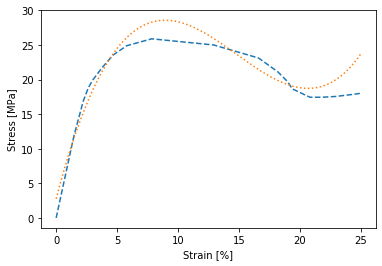

In [74]:
plt.plot(data[:,0], data[:,1], linestyle="--")
plt.plot(xp, polynomial(xp), linestyle="dotted")
plt.xlabel("Strain [%]")
plt.ylabel("Stress [MPa]")

In [75]:
data[0:5,0]

array([0.        , 1.46370023, 2.22482436, 2.63466042, 2.98594848])

In [76]:
data[0:5,1]

array([ 0.        , 11.88888889, 16.88888889, 18.77777778, 19.88888889])

In [77]:
data[0:10,0]

array([ 0.        ,  1.46370023,  2.22482436,  2.63466042,  2.98594848,
        3.7470726 ,  4.68384075,  5.79625293,  7.84543326, 12.93911007])

In [78]:
data[0:10,1]

array([ 0.        , 11.88888889, 16.88888889, 18.77777778, 19.88888889,
       21.66666667, 23.55555556, 24.88888889, 25.88888889, 25.        ])

In [79]:
x = np.array([0, 2.98594848, 7.84543325526932, 20.843091334894616])

In [80]:
y = np.array([0, 19.88888889, 25.888888888888893, 60.0])
#y[:] = y[:] * 1e6

In [81]:
z1 = np.polyfit(x, y, 3)
p = np.poly1d(z1)
z1

array([ 3.69164292e-02, -1.09148493e+00,  9.59080288e+00, -4.56114282e-14])

In [82]:
func = z1[0] * (xp - 1)**3 + z1[1] * (xp - 1)**2 + z1[2] * (xp - 1)

Text(0, 0.5, 'Stress [MPa]')

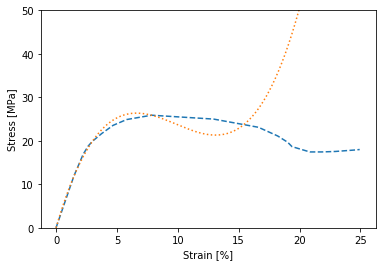

In [83]:
plt.plot(data[:,0], data[:,1], linestyle="--")
plt.plot(xp, p(xp), linestyle="dotted")
plt.ylim([0,50])
plt.xlabel("Strain [%]")
plt.ylabel("Stress [MPa]")

In [34]:
z1


array([ 3.69164292e-02, -1.09148493e+00,  9.59080288e+00, -4.56114282e-14])